# Artificial Neural Networks with Keras

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/INPT-2020/blob/master/Notebooks_DL/ANN_with_keras.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

In [2]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
tf.__version__

'2.8.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [6]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [7]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [8]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

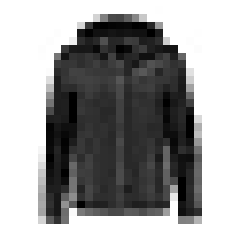

In [9]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [10]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [12]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [13]:
X_valid.shape

(5000, 28, 28)

In [14]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

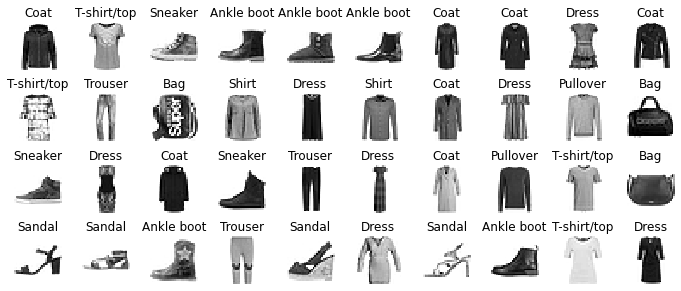

In [15]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Construct a Model

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [17]:
keras.backend.clear_session()
np.random.seed(42)

### or using the folowing method

In [18]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [19]:
model.layers

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
#keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [22]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [23]:
model.get_layer(hidden1.name) is hidden1

True

In [24]:
weights, biases = hidden1.get_weights()

In [25]:
weights

array([[-0.02824292, -0.00075968,  0.02934486, ...,  0.03469189,
        -0.02943216,  0.01424725],
       [ 0.0052272 ,  0.00794173,  0.06100446, ..., -0.06626644,
        -0.0696058 , -0.04029929],
       [ 0.00190599,  0.06568931,  0.00089353, ...,  0.03835302,
        -0.0212706 ,  0.06568782],
       ...,
       [ 0.0695477 ,  0.00460985,  0.00616942, ..., -0.00161991,
        -0.07090707, -0.03693365],
       [-0.07332996,  0.02598657, -0.02181582, ...,  0.06510733,
        -0.04712497, -0.02707433],
       [ 0.05914645,  0.06739786,  0.0612042 , ..., -0.03143398,
         0.01229606,  0.00527526]], dtype=float32)

In [26]:
weights.shape

(784, 300)

In [27]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [28]:
biases.shape

(300,)

### Compile the Model
Here you can chose the loss function, the optimizer, the performance metric, etc. check Keras documentation for further details.

In [29]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

### Train the model
Here you can chose how many epochs you need and the batch size.

In [30]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.7201 - accuracy: 0.7675 - val_loss: 0.5024 - val_accuracy: 0.8334
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4883 - accuracy: 0.8293 - val_loss: 0.4604 - val_accuracy: 0.8442
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4418 - accuracy: 0.8448 - val_loss: 0.4191 - val_accuracy: 0.8574
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4137 - accuracy: 0.8550 - val_loss: 0.3922 - val_accuracy: 0.8656
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3927 - accuracy: 0.8620 - val_loss: 0.3882 - val_accuracy: 0.8650
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3779 - accuracy: 0.8674 - val_loss: 0.3873 - val_accuracy: 0.8654
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3641 - accuracy: 0.8720 - val_loss: 0.3611 - val_accuracy:

In [31]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [32]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [56]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot learning Curves

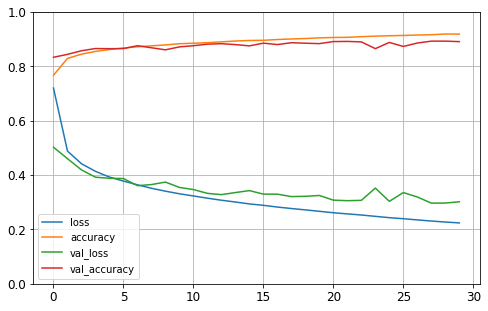

In [34]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [35]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3258 - accuracy: 0.8842


[0.3257611393928528, 0.8841999769210815]

In [36]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [37]:
y_pred = np.argmax(model.predict(X_new),axis = -1)
y_pred

array([9, 2, 1])

In [38]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [39]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

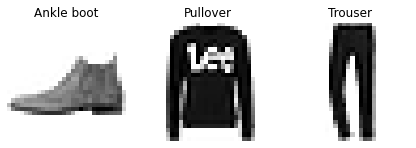

In [40]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Exercise

#### 1) Plot Learning curves when using different optimizers
#### 2) Plot Learning curves when using different batch size
#### 3) Plot Learning curves when using different number of epochs
#### 4) Add additional neurons and use Dropout Layer. Plot Learning curves.
#### 5) Use Batch Normalisation
#### 6) repeat with more layers
#### 7) apply on different datasets

Learning Curves using 'adam' optimizer ▶



In [41]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [42]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4785 - accuracy: 0.8279 - val_loss: 0.3934 - val_accuracy: 0.8580
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3658 - accuracy: 0.8646 - val_loss: 0.3583 - val_accuracy: 0.8664
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3275 - accuracy: 0.8800 - val_loss: 0.3289 - val_accuracy: 0.8764
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3034 - accuracy: 0.8876 - val_loss: 0.3465 - val_accuracy: 0.8724
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2855 - accuracy: 0.8936 - val_loss: 0.3009 - val_accuracy: 0.8908
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2685 - accuracy: 0.8999 - val_loss: 0.3053 - val_accuracy: 0.8896
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2549 - accuracy: 0.9033 - val_loss: 0.3051 - val_accuracy:

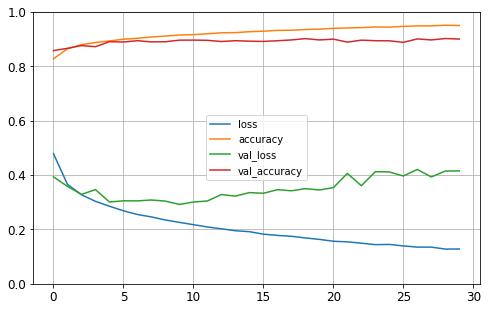

In [43]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Learning curves using different batch sizes

In [44]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [45]:
history = model.fit(X_train, y_train, batch_size=10, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
5500/5500 [==============================] - 13s 2ms/step - loss: 0.5821 - accuracy: 0.7963 - val_loss: 0.4468 - val_accuracy: 0.8354
Epoch 2/30
5500/5500 [==============================] - 13s 2ms/step - loss: 0.4168 - accuracy: 0.8507 - val_loss: 0.4046 - val_accuracy: 0.8556
Epoch 3/30
5500/5500 [==============================] - 12s 2ms/step - loss: 0.3747 - accuracy: 0.8646 - val_loss: 0.3625 - val_accuracy: 0.8688
Epoch 4/30
5500/5500 [==============================] - 12s 2ms/step - loss: 0.3458 - accuracy: 0.8747 - val_loss: 0.3322 - val_accuracy: 0.8822
Epoch 5/30
5500/5500 [==============================] - 12s 2ms/step - loss: 0.3267 - accuracy: 0.8825 - val_loss: 0.3279 - val_accuracy: 0.8842
Epoch 6/30
5500/5500 [==============================] - 13s 2ms/step - loss: 0.3111 - accuracy: 0.8858 - val_loss: 0.3179 - val_accuracy: 0.8844
Epoch 7/30
5500/5500 [==============================] - 12s 2ms/step - loss: 0.2977 - accuracy: 0.8903 - val_loss: 0.3058 - val_ac

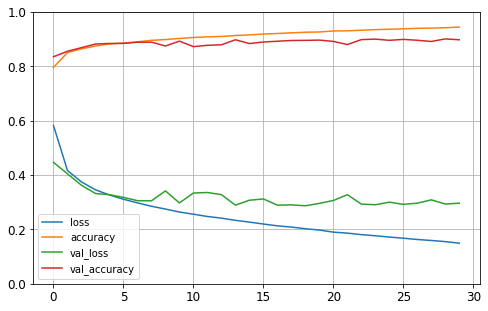

In [46]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

bigger batch size

In [47]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [48]:
history = model.fit(X_train, y_train, batch_size=100, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
550/550 [==============================] - 2s 3ms/step - loss: 0.9571 - accuracy: 0.7122 - val_loss: 0.6444 - val_accuracy: 0.7926
Epoch 2/30
550/550 [==============================] - 1s 3ms/step - loss: 0.5935 - accuracy: 0.8046 - val_loss: 0.5377 - val_accuracy: 0.8214
Epoch 3/30
550/550 [==============================] - 1s 2ms/step - loss: 0.5236 - accuracy: 0.8225 - val_loss: 0.4881 - val_accuracy: 0.8346
Epoch 4/30
550/550 [==============================] - 1s 3ms/step - loss: 0.4891 - accuracy: 0.8315 - val_loss: 0.4680 - val_accuracy: 0.8428
Epoch 5/30
550/550 [==============================] - 1s 2ms/step - loss: 0.4653 - accuracy: 0.8396 - val_loss: 0.4507 - val_accuracy: 0.8470
Epoch 6/30
550/550 [==============================] - 1s 2ms/step - loss: 0.4486 - accuracy: 0.8455 - val_loss: 0.4316 - val_accuracy: 0.8552
Epoch 7/30
550/550 [==============================] - 1s 2ms/step - loss: 0.4349 - accuracy: 0.8484 - val_loss: 0.4345 - val_accuracy: 0.8474
Epoch 

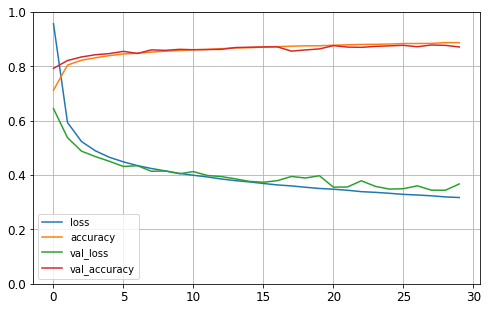

In [49]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Learning curves using different number of epochs

In [50]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [51]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7056 - accuracy: 0.7672 - val_loss: 0.5282 - val_accuracy: 0.8242
Epoch 2/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4849 - accuracy: 0.8308 - val_loss: 0.4661 - val_accuracy: 0.8418
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4388 - accuracy: 0.8446 - val_loss: 0.4024 - val_accuracy: 0.8640
Epoch 4/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4124 - accuracy: 0.8543 - val_loss: 0.4009 - val_accuracy: 0.8590
Epoch 5/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3920 - accuracy: 0.8623 - val_loss: 0.4014 - val_accuracy: 0.8656
Epoch 6/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3766 - accuracy: 0.8671 - val_loss: 0.3828 - val_accuracy: 0.8628
Epoch 7/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3641 - accuracy: 0.8715 - val_loss: 0.4060 - val_ac

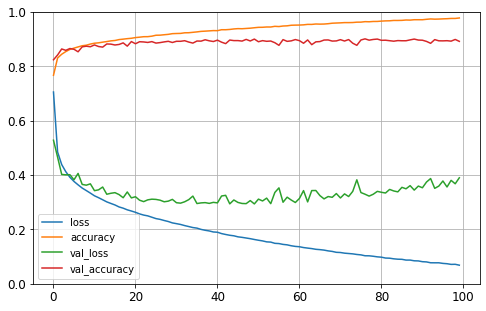

In [52]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [53]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=15,
                    validation_data=(X_valid, y_valid))


Epoch 1/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7160 - accuracy: 0.7642 - val_loss: 0.5263 - val_accuracy: 0.8200
Epoch 2/15
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4935 - accuracy: 0.8280 - val_loss: 0.4521 - val_accuracy: 0.8440
Epoch 3/15
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4486 - accuracy: 0.8421 - val_loss: 0.4109 - val_accuracy: 0.8572
Epoch 4/15
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4199 - accuracy: 0.8532 - val_loss: 0.4025 - val_accuracy: 0.8590
Epoch 5/15
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4011 - accuracy: 0.8604 - val_loss: 0.3888 - val_accuracy: 0.8662
Epoch 6/15
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3834 - accuracy: 0.8651 - val_loss: 0.3809 - val_accuracy: 0.8662
Epoch 7/15
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3693 - accuracy: 0.8702 - val_loss: 0.3968 - val_accuracy:

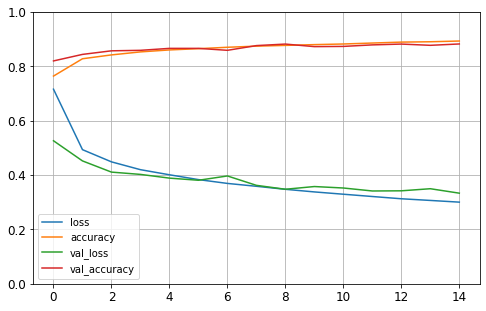

In [59]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Using Additional neurones and adding drop-out layers

In [72]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(400, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=40, epochs=100,
                    validation_data=(X_valid, y_valid))



Epoch 1/100
1375/1375 [==============================] - 4s 3ms/step - loss: 1.1804 - accuracy: 0.5640 - val_loss: 0.6791 - val_accuracy: 0.7446
Epoch 2/100
1375/1375 [==============================] - 3s 2ms/step - loss: 0.8131 - accuracy: 0.6981 - val_loss: 0.6037 - val_accuracy: 0.7750
Epoch 3/100
1375/1375 [==============================] - 3s 2ms/step - loss: 0.7324 - accuracy: 0.7289 - val_loss: 0.5609 - val_accuracy: 0.7938
Epoch 4/100
1375/1375 [==============================] - 3s 2ms/step - loss: 0.6817 - accuracy: 0.7496 - val_loss: 0.5327 - val_accuracy: 0.8068
Epoch 5/100
1375/1375 [==============================] - 4s 3ms/step - loss: 0.6555 - accuracy: 0.7615 - val_loss: 0.5098 - val_accuracy: 0.8198
Epoch 6/100
1375/1375 [==============================] - 4s 3ms/step - loss: 0.6311 - accuracy: 0.7692 - val_loss: 0.4880 - val_accuracy: 0.8298
Epoch 7/100
1375/1375 [==============================] - 3s 2ms/step - loss: 0.6076 - accuracy: 0.7770 - val_loss: 0.4721 - val_ac

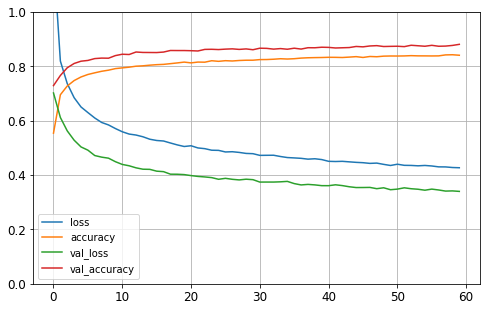

In [62]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Dropout results a validation accuracy higher than training accuracy, let's check the balance of test set and then evaluate the model because of the validation pass use all the neurones unlike the training phase

In [70]:
pd.Series(y_test).value_counts().sort_index(ascending=True)

0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
dtype: int64

In [71]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3776 - accuracy: 0.8631


[0.37761229276657104, 0.863099992275238]

Adding layers combined with dropout

In [76]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(500, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(400, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=40, epochs=100,
                    validation_data=(X_valid, y_valid))


Epoch 1/100
1375/1375 [==============================] - 4s 3ms/step - loss: 1.0727 - accuracy: 0.6130 - val_loss: 0.6076 - val_accuracy: 0.7724
Epoch 2/100
1375/1375 [==============================] - 4s 3ms/step - loss: 0.6285 - accuracy: 0.7726 - val_loss: 0.4850 - val_accuracy: 0.8314
Epoch 3/100
1375/1375 [==============================] - 4s 3ms/step - loss: 0.5488 - accuracy: 0.8028 - val_loss: 0.4289 - val_accuracy: 0.8530
Epoch 4/100
1375/1375 [==============================] - 4s 3ms/step - loss: 0.5051 - accuracy: 0.8181 - val_loss: 0.4170 - val_accuracy: 0.8494
Epoch 5/100
1375/1375 [==============================] - 4s 3ms/step - loss: 0.4781 - accuracy: 0.8274 - val_loss: 0.3938 - val_accuracy: 0.8614
Epoch 6/100
1375/1375 [==============================] - 4s 3ms/step - loss: 0.4534 - accuracy: 0.8383 - val_loss: 0.3766 - val_accuracy: 0.8686
Epoch 7/100
1375/1375 [==============================] - 4s 3ms/step - loss: 0.4385 - accuracy: 0.8419 - val_loss: 0.3726 - val_ac

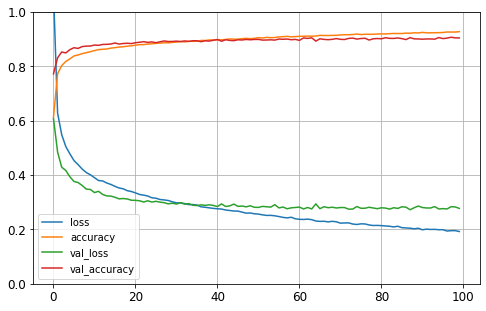

In [77]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [78]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3155 - accuracy: 0.8946


[0.31553521752357483, 0.894599974155426]